In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

In [57]:
import sys
print(sys.executable)


C:\Users\akash\anaconda3\python.exe


In [58]:
df = pd.read_csv("spotify-2023.csv", encoding="latin1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [60]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [61]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

##### We see nan as a value in 2nd row and rest stored as string with ',' 
##### We need to convert these to integer or float datatype

In [62]:
df['in_shazam_charts'] = (df['in_shazam_charts'].str.replace(',','',regex = False).astype(float).fillna(0))

In [63]:
df['in_shazam_charts'].dtype

dtype('float64')

In [64]:
df['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

##### Here we notice nan values (95 to be exact)

In [65]:
df[df['key'].isna()][['track_name', 'bpm', 'key', 'mode', 'danceability_%', 'streams']]

,track_name,bpm,key,mode,danceability_%,streams
12,Flowers,118,NaN,Major,71,1316855716
17,What Was I Made For? [From The Motion Picture ...,78,NaN,Major,44,30546883
22,I Wanna Be Yours,135,NaN,Minor,48,1297026226
35,Los del Espacio,120,NaN,Major,81,123122413
44,Barbie World (with Aqua) [From Barbie The Album],144,NaN,Major,77,65156199
...,...,...,...,...,...,...
899,Hold Me Closer,126,NaN,Major,67,284216603
901,After LIKE,125,NaN,Major,68,265548837
903,B.O.T.A. (Baddest Of Them All) - Edit,137,NaN,Major,74,244585109
938,Labyrinth,110,NaN,Major,48,187339835


#### What to do with these Items?
##### All the keys are mentioned in Western Scale but we notice that C Scale is missing array
##### (['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],dtype=object)
- Upon inspection using Google. all missing entries belonged to songs known to be in the key of C (major or minor).
##### Yes, a lot of real world data questions Ike these can be clarified using Google Search and Al. Nothing wrong with it. I searched for the songs that were shown in the output. every song has a C Minor or Major key.
- We filled all missing key values with 'C'  to complete the 12-key coverage in Westem music.
- The node column (0 for minor,1 for major) is retained as-is for future optional analysis.
- This will maintain the balance and completeness of the key distrbution in the dataset

In [66]:
df['key'] = df['key'].fillna('C')
df['key'].dtype

dtype('O')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

In [68]:
df.select_dtypes(include = 'object').columns

Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'key',
       'mode'],
      dtype='object')

In [69]:
for col in df.select_dtypes(include = 'object').columns:
    print(f"\n -> {col} ({df[col].nunique()} unique values): {df[col].unique()}")


 -> track_name (943 unique values): ['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It Was' 'Kill Bill' 'Cupid - Twin Ver.'
 'What Was I Made For? [From The Motion Picture "Barbie"]' 'Classy 101'
 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ' 'I Wanna Be Yours'
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Los del Espacio' 'Frï¿½ï¿½gil (feat. Grupo Front'
 'Blank Space' 'Style' 'TQM' 'El Azul'
 'Sunflower - Spider-Man: Into the Spider-Verse' "I'm Good (Blue)"
 'See You Again' 'Barbie World (with Aqua) [From Barbie The Album]'
 'Angels Like

In [70]:
df['in_deezer_playlists'] = (df['in_deezer_playlists'].str.replace(',','',regex = False).astype(int))

In [71]:
df[df["streams"].str.contains("BPM", case=False, na=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [72]:
df = df.drop(574)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    object 
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   952 no

In [74]:
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')

In [75]:
le = LabelEncoder()
df['key_encoded'] = le.fit_transform(df['key'])
df['key_encoded'].unique()

array([ 2,  4,  8,  0,  5,  9,  3, 11, 10,  7,  1,  6])

In [76]:
if df['mode'].dtype == 'object':
    df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   952 no

In [82]:
df['in_deezer_playlists'].value_counts()

in_deezer_playlists
0       24
15      23
5       20
13      20
8       18
        ..
386      1
135      1
181      1
1509     1
328      1
Name: count, Length: 348, dtype: int64

In [84]:
df.drop(['track_name', 'artist(s)_name'],axis=1, inplace=True)

##### We drop Track and Artist name as it has too many distinct values and is hard for model to use.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    int64  
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    int64  
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      952 non-null    float64
 12  bpm                   952 non-null    int64  
 13  key                   952 non-null    object 
 14  mode                  952 non-null    int64  
 15  danceability_%        952 no

## Feature Selection

In [86]:
model_train_df = df.drop(columns = ["key"])

In [87]:
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45,...,B,1,80,89,83,31,0,8,4,2
1,1,2023,3,23,1474,48,133716286,48,126,58,...,C#,1,71,61,74,7,0,10,4,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,F,1,51,32,53,17,0,31,6,8
3,1,2019,8,23,7858,100,800840817,116,207,125,...,A,1,55,58,72,11,0,11,15,0
4,1,2023,5,18,3133,50,303236322,84,133,87,...,A,0,65,23,80,14,63,11,6,0


In [88]:
model_train_df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45,...,125,1,80,89,83,31,0,8,4,2
1,1,2023,3,23,1474,48,133716286,48,126,58,...,92,1,71,61,74,7,0,10,4,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,138,1,51,32,53,17,0,31,6,8
3,1,2019,8,23,7858,100,800840817,116,207,125,...,170,1,55,58,72,11,0,11,15,0
4,1,2023,5,18,3133,50,303236322,84,133,87,...,144,0,65,23,80,14,63,11,6,0


#### Exploratory Data Analysis (EDA)
##### In this part, the questions we are tackling are:
- What is the overall distribution of the target variable (strearns)?
- Are some musical/audio features (like danceability, energy, valence) highly related to popularity?
- Do certain months. keys. modes or bpm ranges lead to more popular songs?
- Are there any strong correlations between features?
- Do platform variables (e.g., Spotify playlists, Apple chuts) actually influence popularity?

##### Let's check the stream distribution first

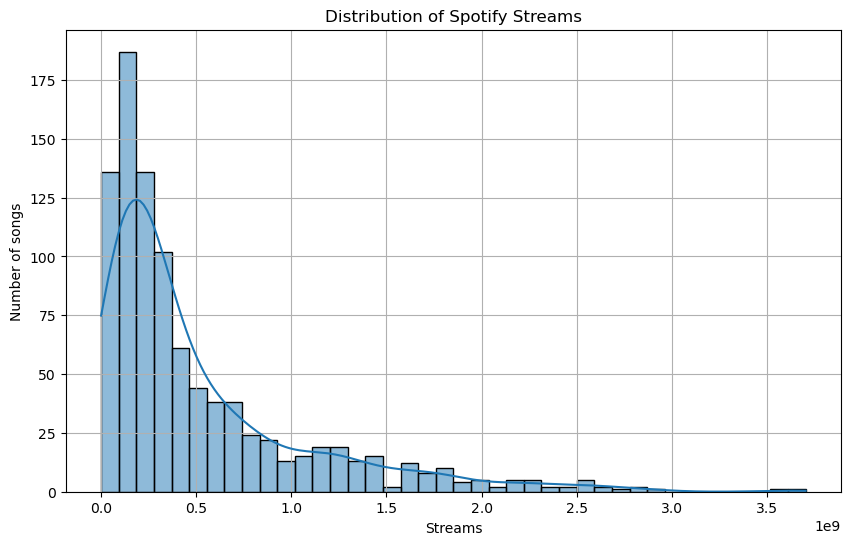

In [90]:
plt.figure(figsize = (10,6))
sns.histplot(df['streams'], kde = True, bins = 40)
plt.title("Distribution of Spotify Streams")
plt.xlabel("Streams")
plt.ylabel("Number of songs")
plt.grid(True)
plt.show()

##### The target variable streams is highly right-skewed, i.e., a few songs have very high streams, while most have lower values. This tells us that stream counts vary a lot, and we may want to log-transform this variable for modeling later.

#### Correlation Heatmap
##### Which feature is strongly related to streams?

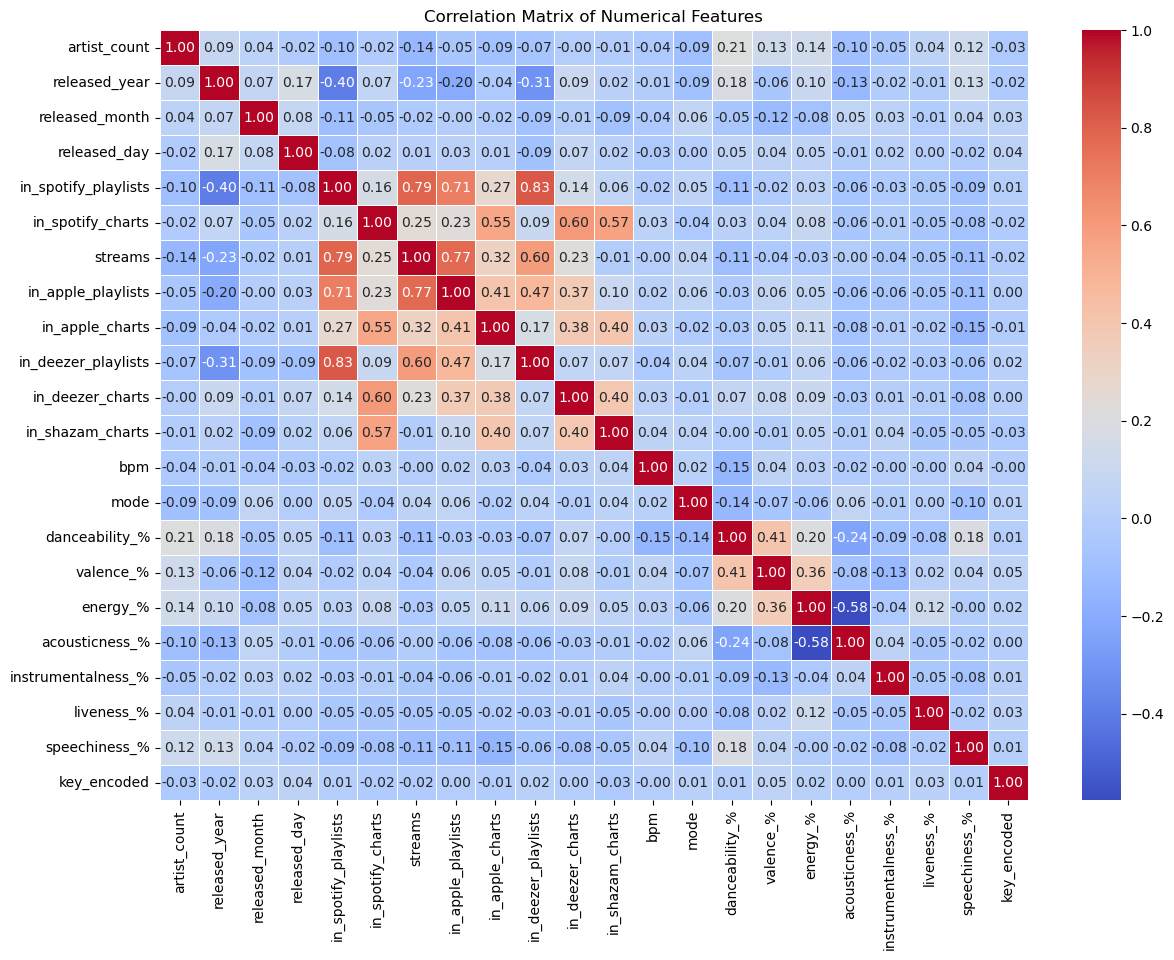

In [91]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = ".2f", cmap = "coolwarm", linewidth = 0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

##### We are mainly checking which features are closely related to streams, our target variable.
##### Key observations:
- streams has a high positive correlation with in_spotify_playlists and decent relation with other platform stats like Apple and Shazam.
- Features like instrumentalness_% and acousticness_% are negatively related to popularity.
- speechiness_% liveness-%, and key-encoded don't show strong correlation and might not help much in prediction.
  
##### Do audio features like danceability, energy, valence affect streams?

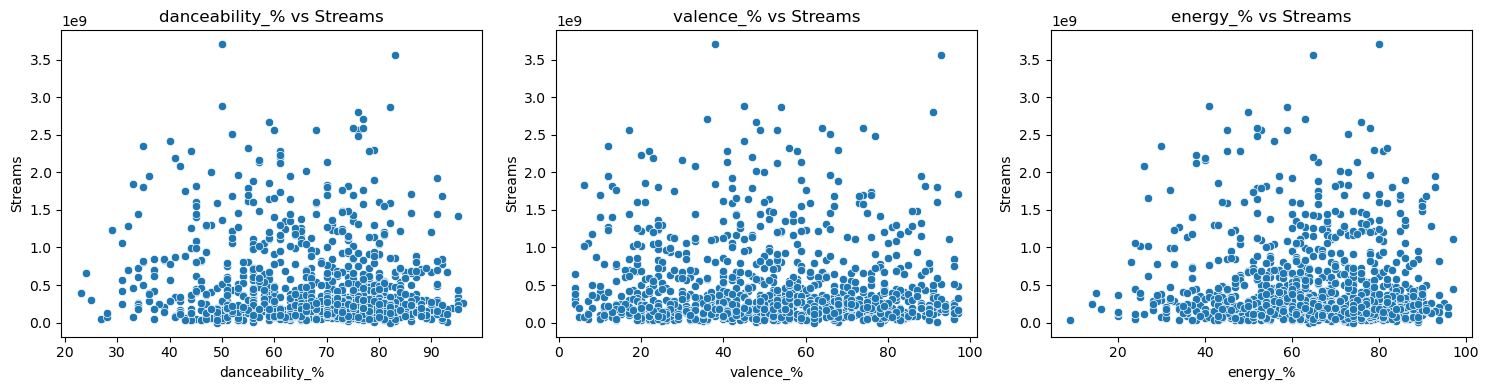

In [92]:
features_to_plot = ['danceability_%', 'valence_%', 'energy_%']
plt.figure(figsize = (15,4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1,3,i+1)
    sns.scatterplot(data = df, x=feature, y = 'streams')
    plt.title(f"{feature} vs Streams")
    plt.xlabel(feature)
    plt.ylabel("Streams")
plt.tight_layout()
plt.show()

###### These scatter plots show how danceability, valence, and energy relate to the number of streams.
- We are checking if higher values in these features lead to more strearns.
- There doesn't seem to be a very strong trend. but we do see that most high-stream songs fall in the rnid-to-high range of these features.
- This suggests that while these features alone may not strongly predict popularity, they could still contrbute when combined with other
factors.

##### Do key mode or bpm influence popularity?

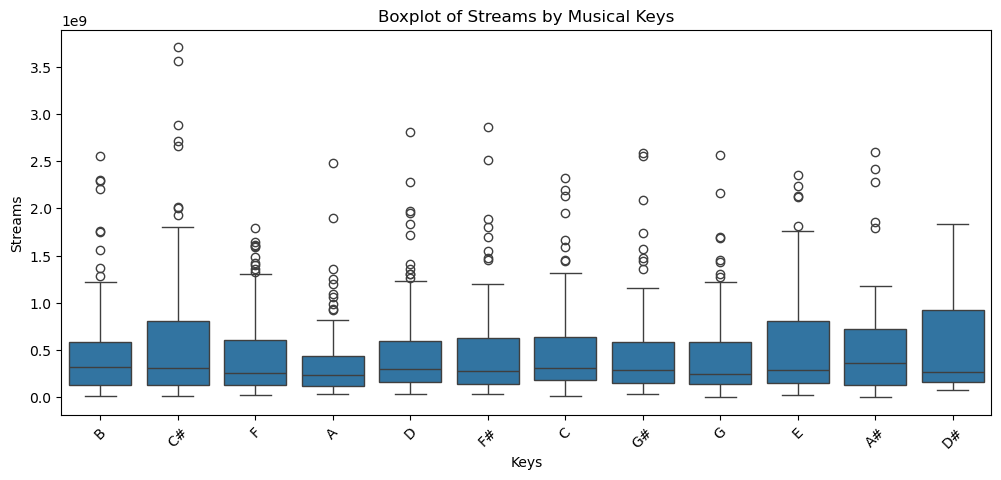

In [93]:
plt.figure(figsize = (12,5))
sns.boxplot(data = df, x = 'key', y = 'streams')
plt.title("Boxplot of Streams by Musical Keys")
plt.xlabel("Keys")
plt.ylabel("Streams")
plt.xticks(rotation=45)
plt.show()

This graph shows how many streams songs got based on their musical key (like C, D#, etc.)
- Each box tells us what the typical stream numbers look like for songs in that key.
- Dots above the box are songs that got a lot more streams than usual.
- For example, keys like C# and E seem to have some songs with very high streams.
- But overall. the number of streams doesn't change too much based on the key.

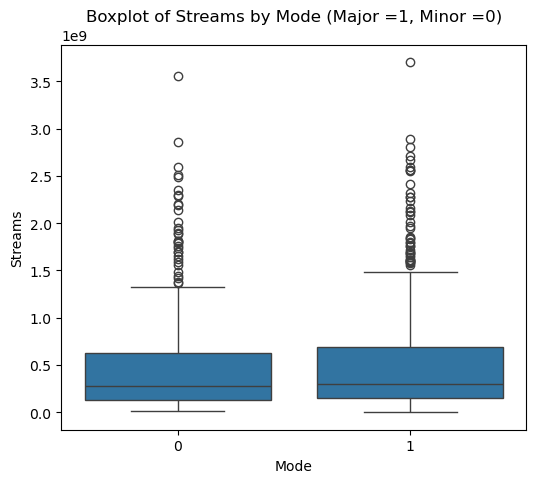

In [94]:
plt.figure(figsize = (6,5))
sns.boxplot(data = df, x = 'mode', y = 'streams')
plt.title("Boxplot of Streams by Mode (Major =1, Minor =0)")
plt.xlabel("Mode")
plt.ylabel("Streams")
plt.show()

##### This graph cornpares songs in major and minor scales.
- It shows how many streams each group got.
- Both types have similar results, but major mode songs (marked as 1) have a few songs that got very tigh strearns.

##### So. being in a major key might help a little, but its not a big factor alone.

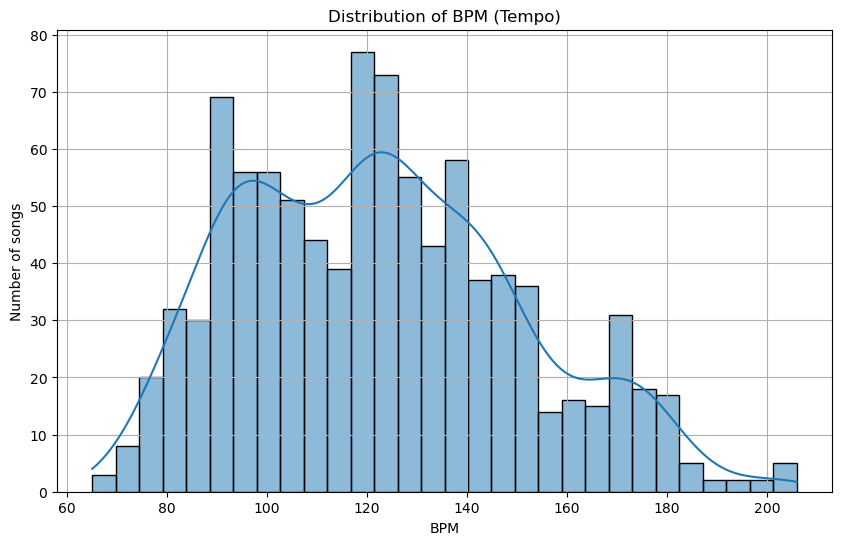

In [95]:
plt.figure(figsize = (10,6))
sns.histplot(df['bpm'], kde = True, bins = 30)
plt.title("Distribution of BPM (Tempo)")
plt.xlabel("BPM")
plt.ylabel("Number of songs")
plt.grid(True)
plt.show()

##### This graph shows how fast or slow most songs are.

- Most songs are between 80 and 140 BPM. with many around 120 BPM.
- Very few songs go above 160 BPM

###### This tells us that most popular songs are in a medium tempo range - not too slow. not too fast.

##### Does release month affect popularity?

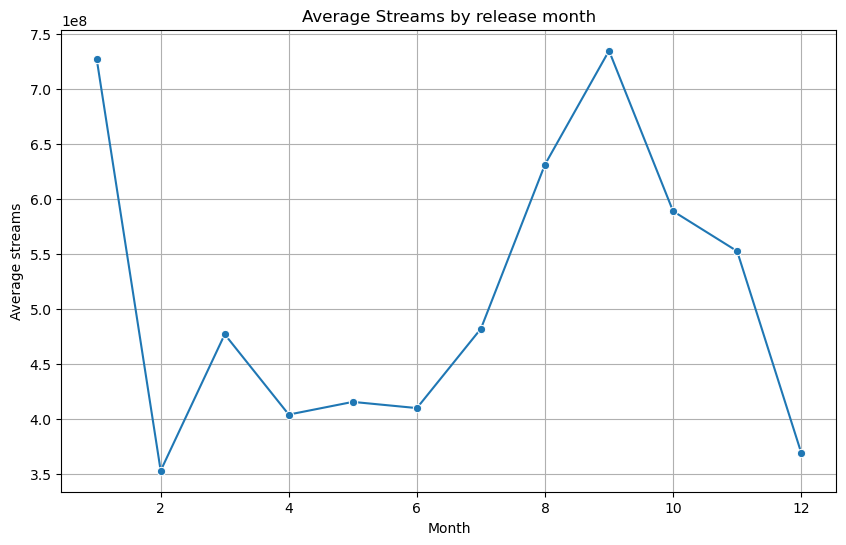

In [96]:
monthly_avg = df.groupby("released_month")['streams'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.lineplot(data =monthly_avg, x = 'released_month', y = 'streams', marker = "o")
plt.title("Average Streams by release month")
plt.xlabel("Month")
plt.ylabel("Average streams")
plt.grid(True)
plt.show()

#### This line graph shows the average number of streams for songs released in each month.
- We can see that songs released in January and September had the highest average streams.
- Theres also a noticeable dip in February and Decernber.
- This could be due to seasonal trends, festivals. or mustry release cycles where more high-profile tracks drop at the beginning or end of quarters.
##### Even though we dropped artist narnes, these trends might still reflect the influence of big-narne artists releasing music dumg certain months. So, while the pattem is useful. we must be cautious in over-interpreting it without deeper artist level data,


##### Business Impact (for the A&R & Marketing Teams):
- A&R Teams can strategically plan artist launches during higher-performing months to increase exposure and maximize strearning numbers.
- Marketing Teams can align carnpaigns and playlist placements around these periods to take advantage of naturally higher listener engagement.
- These insights help optimize resource allocation, ensuring that strong tracks arent released during low-performing months unless they have suffcient backing or exclusivity deals.
###### In short, this type of analysis helps A&R teams tirne releases better and increase the chances of a song becoming a hit.

##### Platform Influence - Does presence on playlists/charts boost streaming 

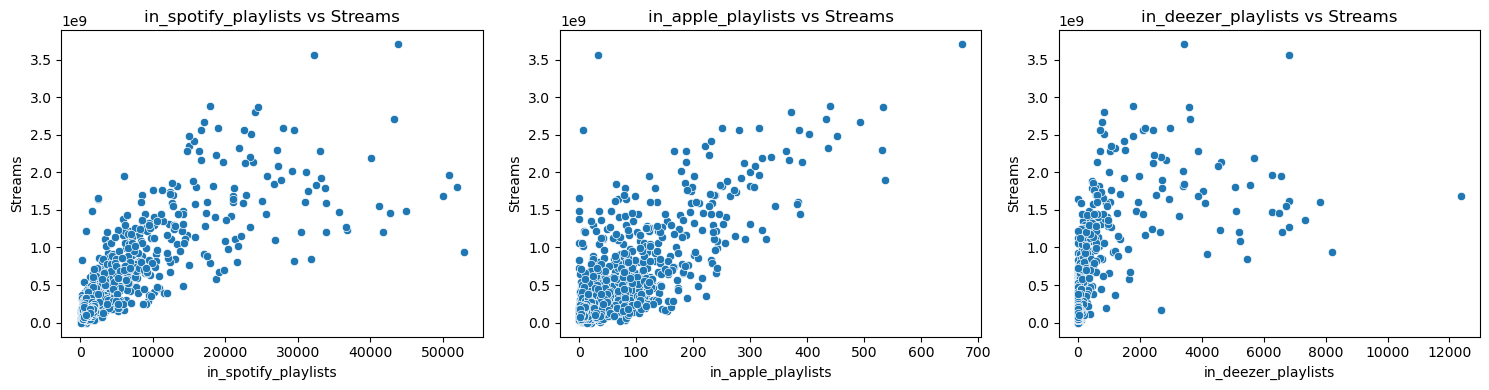

In [97]:
platform_features = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
plt.figure(figsize = (15,4))
for i, feature in enumerate(platform_features):
    plt.subplot(1,3,i+1)
    sns.scatterplot(data = df, x=feature, y = 'streams')
    plt.title(f"{feature} vs Streams")
    plt.xlabel(feature)
    plt.ylabel("Streams")
plt.tight_layout()
plt.show()

##### In the above scatter plots, were checking if there's a link between how many playlists a song appears in and how many streams it gets.
- Spotify: We can clearly see that songs in more Spotify playlists generally get more streams. The trend is quite strong here.
- Apple Music: A similar trend appears—more playlists. more streams. But the spread is a bit wider.
- Deezer. This one's a little less clear. probably due to fewer songs having large Deezer presence.
###### What this means: Songs that appear in more playlists tend to be streamed more. So it makes sense to push for higher playlist visibility, especially on Spotify and Apple Music.

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Train- Test Split

In [98]:
X = model_train_df.drop('streams', axis =1)
Y = model_train_df['streams']

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

#### Model Selection & Model Training — What a Data Scientist Should Think Before
##### Choosing a Model: Before randomsly selecting a model. it is important to ask some key questions,
##### QI. What are we trying to do?
- We are trying to predict the popularity of a song by nurnber of streams using the audio features and platform-related statistics.
- So, this is clearly a "REGRESSION" problem, because the output "STREAMS" is a continuos number and not a label like yes or no used in classification.
- 
##### Q2. What do we know about the data?
- We have around 950 rows, which is a small to medium dataset
- We are done with cleaning and pre-processing of the data.
- The dataset has a mix of numeric features and a few categorical features but we encoded them.
- We don't know if the data has a linear relationship or something more complex.
##### Q3. What do we want out of the model?
###### As a company we should care about 2 things:
- Understanding what influences popularity. i.e. we need something interpretable.
- We also need good performance, i.e. getting good precfictions.

##### The plan: We use 3 models:
- Lineae Regression: It is the simplest and gives a good baseline, it will also help us to understsnd the relationship of the data and feature
- Random Forest - tt works well to find non-linear patterns and gives feature importance tm.
- XGBoost: It is considered one of the best models. We can use this if we want to push for performance and optimize further.

###### We won't touch overty complex models like neural networks here, since our dataset is small and the goal is clarity + insights.

In [100]:
def train_and_evaluate(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(Y_test, predictions)
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse: .2f}")
    print(f"R\u00B2   : {r2: .2f}")
    print("-" * 30)

    return {
        "model": model.__class__.__name__,
        "MAE": mae,
        "MSE": mse,
        "R\u00B2": r2,
        "model_object": model,
        "predictions": predictions
    }

In [101]:
models_before_transform = [ LinearRegression(), RandomForestRegressor(random_state = 42)]
results= [ ]

for model in models_before_transform:
    result = train_and_evaluate(model, X_train, X_test, Y_train, Y_test)
    results.append(result)

Model: LinearRegression
MAE  : 186665575.46
MSE  :  70164083509558976.00
R²   :  0.71
------------------------------
Model: RandomForestRegressor
MAE  : 133711848.62
MSE  :  43282841307622696.00
R²   :  0.82
------------------------------


In [102]:
def evaluate_model_cv(model, X, Y, cv =5):
    scores =cross_validate(model, X, Y, cv = cv, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'), return_train_score = False)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean R\u00B2   : {scores['test_r2'].mean(): .2f}")
    print(f"Mean MAE  : {-scores['test_neg_mean_absolute_error'].mean():.2f}")
    print(f"Mean MSE  : {-scores['test_neg_mean_squared_error'].mean(): .2f}")
    print("-" * 30)

In [103]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state = 42)

evaluate_model_cv(lin_reg, X, Y)
evaluate_model_cv(rf_reg, X, Y)

Model: LinearRegression
Mean R²   :  0.58
Mean MAE  : 211822873.16
Mean MSE  :  103002216302624672.00
------------------------------
Model: RandomForestRegressor
Mean R²   :  0.71
Mean MAE  : 167541351.68
Mean MSE  :  69794061190678208.00
------------------------------


In [104]:
xgb_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)

In [107]:
xgb_results = train_and_evaluate(xgb_model, X_train, X_test, Y_train, Y_test) 

Model: XGBRegressor
MAE  : 136584608.00
MSE  :  44398928069656576.00
R²   :  0.82
------------------------------


In [108]:
evaluate_model_cv(xgb_model, X_train, Y_train)

Model: XGBRegressor
Mean R²   :  0.80
Mean MAE  : 150190956.80
Mean MSE  :  64537216253794712.00
------------------------------


##### Log Transformation of the streams column

In [113]:
Y_train_log = np.log1p(Y_train)
Y_test_log = np.log1p(Y_test)

##### Transformed to log as the "streams" column had a very wide range. i.e.. some songs had millions of streams, other had just a few thousand. This creates a highly skewed distribution, which can:
- Affect model performance (especially linear models).
- Give more weight to very high values during training, making the model biased.
###### So. we applied a log transformation to compress the range and make the distribution more balanced.

In [114]:
Y_train_log.head()

318    18.866742
545    20.212057
557    18.505105
109    20.874802
77     20.930829
Name: streams, dtype: float64

In [115]:
models_after_transform = [ LinearRegression(), RandomForestRegressor(random_state = 42), XGBRegressor(random_state=42, verbosity = 0)]
log_model_results= [ ]

for model in models_after_transform:
    result = train_and_evaluate(model, X_train, X_test, Y_train_log, Y_test_log)
    log_model_results.append(result)

Model: LinearRegression
MAE  : 0.55
MSE  :  0.49
R²   :  0.52
------------------------------
Model: RandomForestRegressor
MAE  : 0.36
MSE  :  0.22
R²   :  0.79
------------------------------
Model: XGBRegressor
MAE  : 0.37
MSE  :  0.23
R²   :  0.78
------------------------------


In [116]:
for model in models_after_transform:
    evaluate_model_cv(model, X_train, Y_train_log)

Model: LinearRegression
Mean R²   :  0.46
Mean MAE  : 0.61
Mean MSE  :  0.77
------------------------------
Model: RandomForestRegressor
Mean R²   :  0.73
Mean MAE  : 0.36
Mean MSE  :  0.42
------------------------------
Model: XGBRegressor
Mean R²   :  0.67
Mean MAE  : 0.37
Mean MSE  :  0.48
------------------------------


#### Differences in performance: Before vs After Log Transformation
##### Without Log Transformation:
- Models were trained on raw stream numbers.
- The error metrics (MAE/MSE) were very large in absolute nurnbers. e.g.. in the millions or trillions. which are hard to interpret.
- Random Forest and XGBoost still performed well. but results were on a different scale.
##### With Log Transformation:
- The models trained on log(streams), so the predictions were also in log scale.
- Error metrics like MAE. MSE and R2 are now easier to interpret and compare.
- The overall performance of models became more consistent and reliable (especially visible cross-validation).
- Linear Regression irnproved slightly in interpretability but still underperformed.
##### What to use going forward?
###### We will stick with the log-transformed model because:
- It's mathematically stable (less skewed, easier optimization).
- Helps avoid overfitting to songs with extreme stream values.
- Gives better and interpretable scores in cross-validation

### Feature Importance Analysis
##### Now that we have trained and evaluated our models, it's important to understand:
- Which features (audio/platform-related) are influencing the predictions the most?
- What can we tell the Marketing and A&R teams about what makes a song likely to go viral?
###### This helps tum a black-box model into something interpretable and actionable.
##### What are we tackling here?
- Identify top features using RandomForestRegressor and XGBRegressor
- Visualize the feature importances
- Interpret the results in simple terms
- Suggest practical uses (e.g. playlist selection artist promotion)

In [132]:
def plot_feature_importance(model, X_train, top_n = 10):
    importances = model.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances}).sort_values(by="Importance", ascending = False).head(top_n)

    plt.figure(figsize=(10,6))
    colors = sns.color_palette("viridis", len(feat_imp_df))
    sns.barplot(x='Importance', y = 'Feature', data = feat_imp_df, palette=colors, hue = 'Feature', legend = False)
    plt.title(f"Top {top_n} Feature Importance - {model.__class__.__name__}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

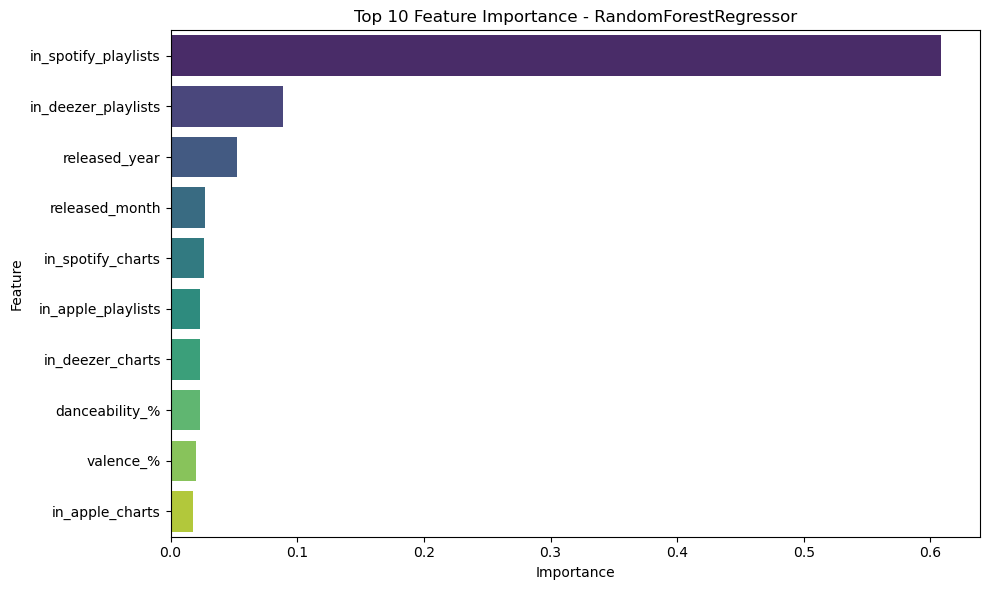

In [133]:
plot_feature_importance(models_after_transform[1], X_train)

##### In this graph, the most dominant feature is:
- in-spotify-playlists: This has the highest importance by far The model heavily relied on how many Spotify playlists a song is in. That tells us playlist expbsure is a major driver of streams.
###### Other useful features:
- in-deezer_playlists. released_year, and in_spotify_charts also contrbute. but much less compared to in_spotify_playfists.
- Some audio features like danceability_% and valence_% made it into the top 10, which shows they still matter but are not as impactful as platform presence.

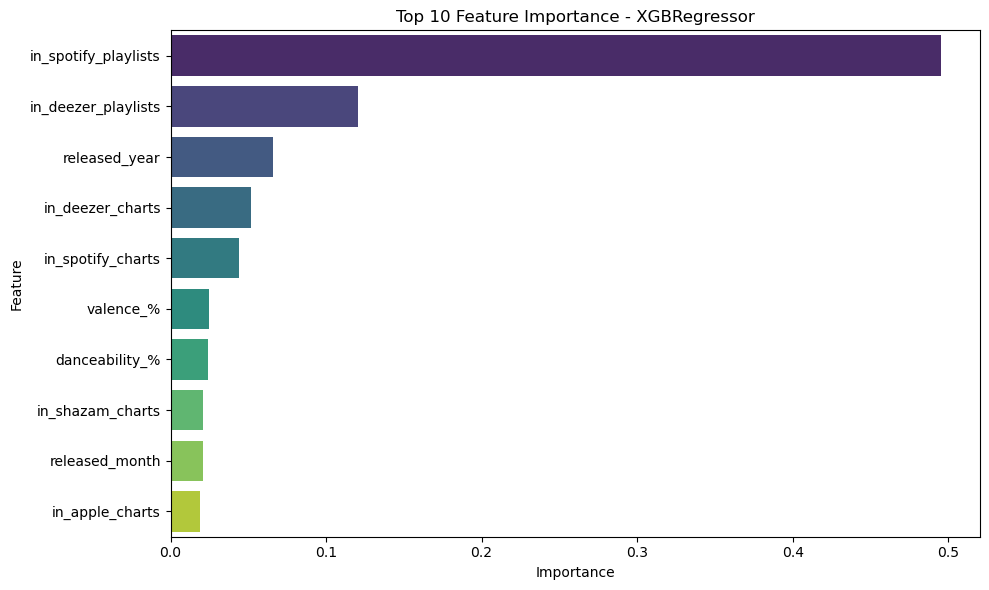

In [134]:
plot_feature_importance(models_after_transform[2], X_train)         #XGBoost

##### Same story here the top feature again is:
- in-spotify-playlists. followed by
- in-deezer-playlists. released-year. and platform chart presence features.
##### From both models. we can conclude:
- Platform presence (especially Spotify) is the strongest predictor of a song's success.
- Audio features are helpful but secondary.
- When planning promotions, focus first on playlist reach. then fine-tune the song characteristics.

### The End
##### We successfully completed our data analysis and built multiple models to predict song popularity. Now, as the next step. we'll be shifting to modular code structure, the way a data scientist or ML engineer would do in real-world scenarios. This means:
- Keeping our training logic. evaluation, and utilities in separate clean files.
- Making the code more reusable, readable, and easier to debug or upgrade later.
##### This modular approach is super important when you're working on larger projects or when the same codebase is used by different people in a team.
##### After this, we'll deploy our final model using Streamlit -  building a clean frontend where users can input song features md see the predicted popularity. Well also include key insights from our EDA and model training phase to help internal teams like Marketing and A&R make data- driven decisions.
#### This final step is all about presenting your work like a product— not just a Jupyter Notebook sitting idle.

In [139]:
import joblib
import os
os.makedirs("models", exist_ok=True)
#assuming RF model is the best after log transformation
joblib.dump(models_after_transform[1], "./models/random_forest_log_model.pkl")

['./models/random_forest_log_model.pkl']